Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [3]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd

In [4]:
from scat_plt_function import scat_plt
from group_and_average_function import group_and_average

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [6]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

In [72]:
# your code here

### 2. Basic EDA based on plots and descriptive statistics

In [73]:
# your code here

### 3. Aggregating and transforming variables in the dataset

Axes(0.125,0.11;0.775x0.77)


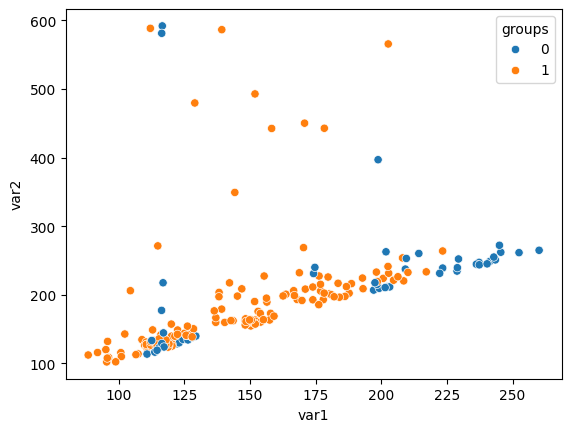

In [7]:
# checking correlations between variables related to fundamental frequency 
print(scat_plt(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], df['status']))

# droping columns: MDVP:Flo(Hz)

Axes(0.125,0.11;0.775x0.77)


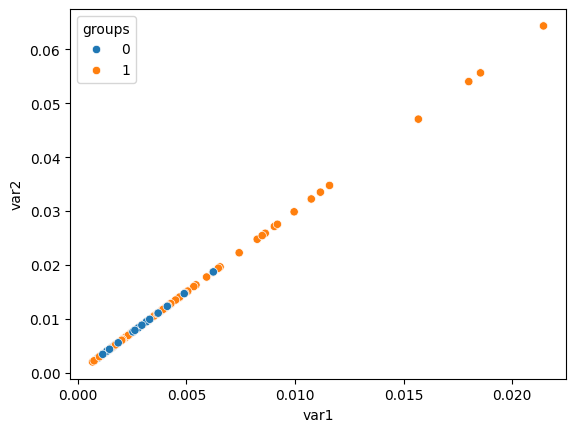

In [8]:
# checking correlations between variables related to Jitter
print(scat_plt(df['MDVP:RAP'], df['Jitter:DDP'], df['status']))

# droping columns: MDVP:Jitter(Abs) and MDVP:PPQ

Axes(0.125,0.11;0.775x0.77)


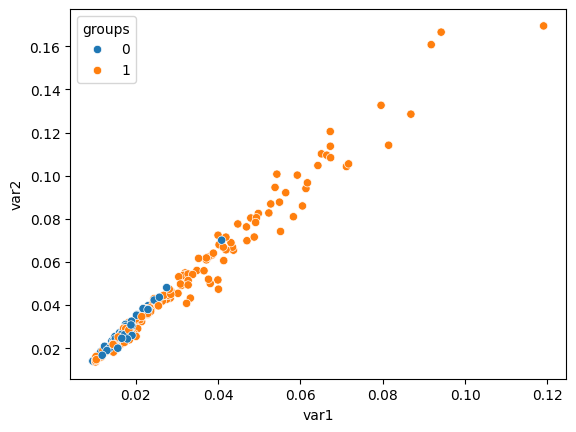

In [9]:
# checking correlations between variables related to Shimmer
print(scat_plt(df['MDVP:Shimmer'], df['Shimmer:DDA'], df['status']))

# droping columns: MDVP:Shimmer(dB), MDVP:APQ, Shimmer:APQ3, Shimmer:APQ5

In [10]:
# create the cleaned_df by removing selected variables
cleaned_df = df.drop(columns = ['MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'MDVP:APQ', 'Shimmer:APQ3', 'Shimmer:APQ5'])
cleaned_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,0.00784,0.00370,0.01109,0.04374,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,0.00968,0.00465,0.01394,0.06134,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,0.01050,0.00544,0.01633,0.05233,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,0.00997,0.00502,0.01505,0.05492,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,0.01284,0.00655,0.01966,0.06425,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
# test
av_df = group_and_average(cleaned_df,'status')
print(av_df)
len(av_df)
list(av_df.columns.values)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Jitter(%)  MDVP:RAP  Jitter:DDP  \
status                                                                    
0        181.937771    223.636750        0.003866  0.001925    0.005776   
1        145.180762    188.441463        0.006989  0.003757    0.011273   

        MDVP:Shimmer  Shimmer:DDA       NHR        HNR      RPDE       DFA  \
status                                                                       
0           0.017615     0.028511  0.011483  24.678750  0.442552  0.695716   
1           0.033658     0.053027  0.029211  20.974048  0.516816  0.725408   

         spread1   spread2        D2       PPE  
status                                          
0      -6.759264  0.160292  2.154491  0.123017  
1      -5.333420  0.248133  2.456058  0.233828  


group_and_average_function.ipynb:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "execution_count": 1,


['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

### 4. Differentiating between controls (healthy subjects) and patients

In [29]:
av_df.index.name = 'status'
av_df.reset_index(inplace=True)
print(av_df)

  status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Jitter(%)  MDVP:RAP  Jitter:DDP  \
0      0   181.937771    223.636750        0.003866  0.001925    0.005776   
1      1   145.180762    188.441463        0.006989  0.003757    0.011273   

   MDVP:Shimmer  Shimmer:DDA       NHR        HNR      RPDE       DFA  \
0      0.017615     0.028511  0.011483  24.678750  0.442552  0.695716   
1      0.033658     0.053027  0.029211  20.974048  0.516816  0.725408   

    spread1   spread2        D2       PPE  
0 -6.759264  0.160292  2.154491  0.123017  
1 -5.333420  0.248133  2.456058  0.233828  


In [36]:
# First scenario: cleaned + aggregated data 
y = cleaned_df['status']
x = cleaned_df.drop(['status', 'name'], axis = 1) # drop all variables that are not predicting variables
# Initialize model with n = 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model on the observed data.
knn.fit(x, y)
# See how model performs. 
Acc = knn.score(x, y)
print('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.9076923076923077


In [ ]:
# Second scenario: cleaned + aggregated data + zscore normalized data
